In [1]:
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
fname = 'trip_purpose_mode'
pd.options.display.float_format = '{:0,.2f}'.format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Trip Mode Share

In [4]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'])
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.1%,0.7%
HOV2,21.6%,18.6%
HOV3+,18.8%,21.5%
SOV,39.5%,44.2%
School Bus,2.0%,1.9%
TNC,1.0%,0.2%
Transit,2.5%,2.5%
Walk,13.5%,9.9%


<AxesSubplot:ylabel='Trip Mode'>

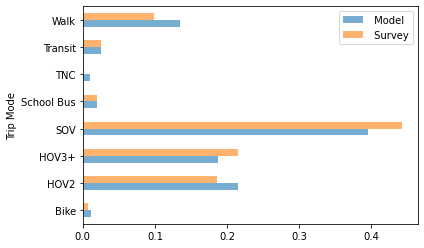

In [5]:
df.plot(kind='barh', alpha=0.6)

# Work Trip Mode Share

In [6]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['dpurp'] == 'Work']
df_survey = df_survey[df_survey['dpurp'] == 'Work']
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'])
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.2%,0.7%
HOV2,9.4%,6.6%
HOV3+,5.7%,2.5%
SOV,65.9%,79.2%
TNC,2.8%,0.5%
Transit,5.0%,3.2%
Walk,10.0%,7.1%


<AxesSubplot:ylabel='Trip Mode'>

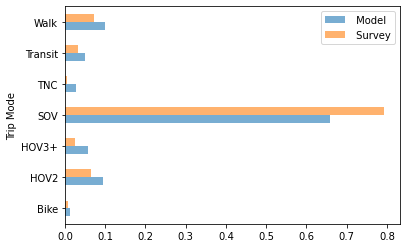

In [7]:
df.plot(kind='barh', alpha=0.6)

# School Trip Mode Share

In [8]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['dpurp'] == 'School']
df_survey = df_survey[df_survey['dpurp'] == 'School']
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'])
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,3.3%,1.5%
HOV2,25.0%,19.2%
HOV3+,27.1%,31.9%
SOV,9.3%,13.2%
School Bus,18.2%,21.6%
TNC,1.9%,0.2%
Transit,3.8%,3.3%
Walk,11.3%,9.1%


<AxesSubplot:ylabel='Trip Mode'>

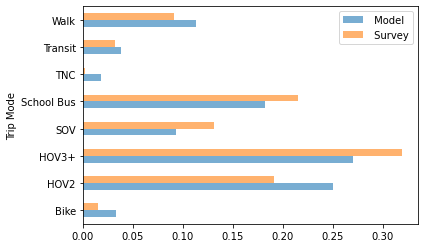

In [9]:
df.plot(kind='barh', alpha=0.6)

# Escort Tour Mode

In [10]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['dpurp'] == 'Escort']
df_survey = df_survey[df_survey['dpurp'] == 'Escort']
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'])
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.0%,0.3%
HOV2,30.9%,31.4%
HOV3+,25.4%,39.0%
SOV,31.6%,23.5%
School Bus,0.3%,0.4%
TNC,0.1%,0.0%
Transit,0.4%,0.1%
Walk,10.3%,5.2%


<AxesSubplot:ylabel='Trip Mode'>

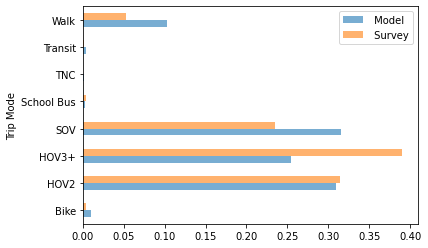

In [11]:
df.plot(kind='barh', alpha=0.6)

# Other Trip Mode

In [12]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[-df_model['dpurp'].isin(['School','Work','Escort'])]
df_survey = df_survey[-df_survey['dpurp'].isin(['School','Work','Escort'])]
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'])
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,0.9%,0.7%
HOV2,22.3%,18.9%
HOV3+,19.6%,21.7%
SOV,38.1%,42.4%
School Bus,1.4%,1.4%
TNC,0.8%,0.2%
Transit,2.3%,2.7%
Walk,14.6%,11.4%


<AxesSubplot:ylabel='Trip Mode'>

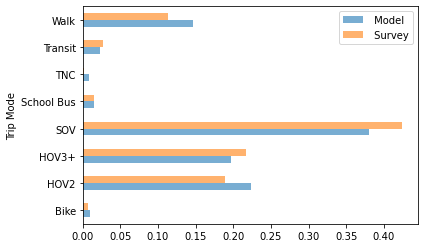

In [13]:
df.plot(kind='barh', alpha=0.6)